In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import os
print(os.getcwd())


C:\Users\jr143\capstone


In [1]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'capston.ipynb', 'nhanes_adult_female_bmx_2020.csv', 'nhanes_adult_male_bmx_2020.csv', 'Untitled.ipynb']


In [1]:
import numpy as np

male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv",
                     delimiter=",",
                     skip_header=1)

female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv",
                       delimiter=",",
                       skip_header=1)

print(male.shape)
print(female.shape)


(4082, 7)
(4222, 7)


ValueError: Axis limits cannot be NaN or Inf

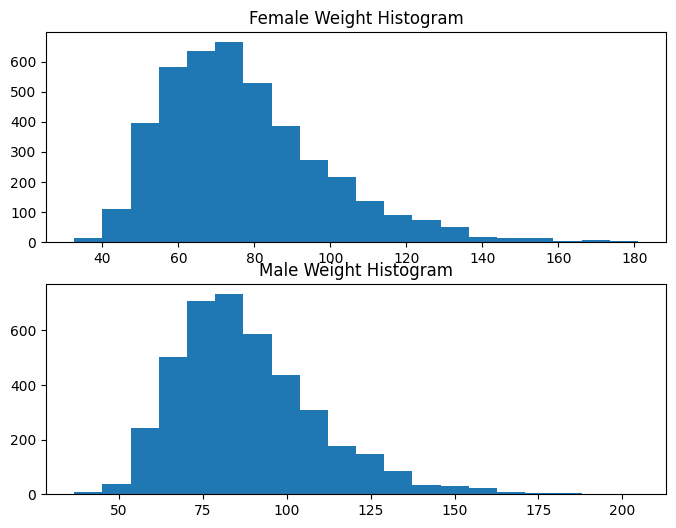

In [5]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8,6))

# Female Histogram (Top)
plt.subplot(2,1,1)
plt.hist(female_weights, bins=20)
plt.title("Female Weight Histogram")

# Male Histogram (Bottom)
plt.subplot(2,1,2)
plt.hist(male_weights, bins=20)
plt.title("Male Weight Histogram")

# Same x-axis limit
min_w = min(female_weights.min(), male_weights.min())
max_w = max(female_weights.max(), male_weights.max())

plt.xlim(min_w, max_w)


plt.tight_layout()
plt.show()

In [7]:
female_weights = female[:,0]
male_weights = male[:,0]

# Remove NaN values
female_weights = female_weights[~np.isnan(female_weights)]
male_weights = male_weights[~np.isnan(male_weights)]


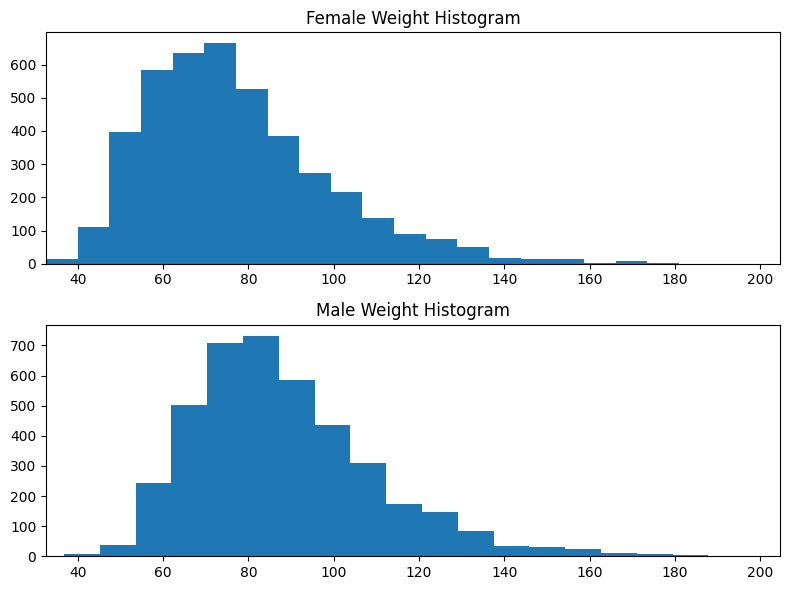

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

min_w = min(female_weights.min(), male_weights.min())
max_w = max(female_weights.max(), male_weights.max())

plt.subplot(2,1,1)
plt.hist(female_weights, bins=20)
plt.title("Female Weight Histogram")
plt.xlim(min_w, max_w)

plt.subplot(2,1,2)
plt.hist(male_weights, bins=20)
plt.title("Male Weight Histogram")
plt.xlim(min_w, max_w)

plt.tight_layout()
plt.show()


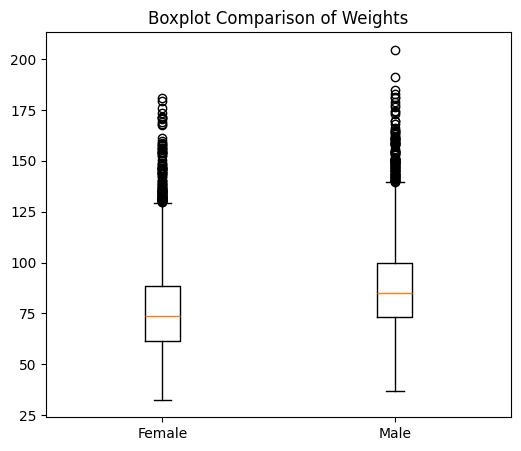

In [9]:
plt.figure(figsize=(6,5))

plt.boxplot([female_weights, male_weights])
plt.xticks([1,2], ["Female", "Male"])
plt.title("Boxplot Comparison of Weights")

plt.show()


In [10]:
print("Female Statistics")
print("Mean:", np.mean(female_weights))
print("Median:", np.median(female_weights))
print("Std Dev:", np.std(female_weights))
print("Min:", np.min(female_weights))
print("Max:", np.max(female_weights))

print("\nMale Statistics")
print("Mean:", np.mean(male_weights))
print("Median:", np.median(male_weights))
print("Std Dev:", np.std(male_weights))
print("Min:", np.min(male_weights))
print("Max:", np.max(male_weights))


Female Statistics
Mean: 77.40379057095475
Median: 73.6
Std Dev: 21.54250829019315
Min: 32.6
Max: 180.9

Male Statistics
Mean: 88.36454300416565
Median: 85.0
Std Dev: 21.418936717962495
Min: 36.8
Max: 204.6


In [11]:
female_height_m = female[:,1] / 100

female_bmi = female_weights / (female_height_m ** 2)

female = np.column_stack((female, female_bmi))

print(female.shape)


ValueError: operands could not be broadcast together with shapes (4221,) (4222,) 

In [12]:
print(female.shape)
print(female_weights.shape)
print(female_height_m.shape)


(4222, 7)
(4221,)
(4222,)


In [13]:
female_weights = female[:, 2]
female_height_m = female[:, 1] / 100

female_bmi = female_weights / (female_height_m ** 2)

female = np.column_stack((female, female_bmi))

print(female.shape)


(4222, 8)


In [14]:
print(len(female[:,1]))
print(len(female[:,2]))


4222
4222


In [15]:
male_weights = male[:, 2]
male_height_m = male[:, 1] / 100

male_bmi = male_weights / (male_height_m ** 2)

male = np.column_stack((male, male_bmi))

print(male.shape)


(4082, 8)


In [16]:
print("Female BMI Mean:", np.mean(female[:, -1]))
print("Male BMI Mean:", np.mean(male[:, -1]))


Female BMI Mean: nan
Male BMI Mean: nan


In [17]:
# Compute column-wise mean and std
female_mean = np.mean(female, axis=0)
female_std = np.std(female, axis=0)

# Standardise
zfemale = (female - female_mean) / female_std

print(zfemale.shape)


(4222, 8)


In [19]:
!pip install seaborn



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", sep=";")


In [9]:
female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", sep="\t")


In [12]:
import pandas as pd


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [18]:
import pandas as pd

female = pd.read_fwf("nhanes_adult_female_bmx_2020.csv")

print(female.columns)
print(female.head())


Index(['# Body measurements of females >= 18 years old [cm], no missing data.'], dtype='str')
  # Body measurements of females >= 18 years old [cm], no missing data.
0                                                  #                   
1                                      # Weight (kg)                   
2                             # Standing Height (cm)                   
3                            # Upper Arm Length (cm)                   
4                            # Upper Leg Length (cm)                   


In [19]:
from scipy.stats import zscore

# Numeric columns மட்டும் select பண்ணுவது நல்லது
numeric_cols = female.select_dtypes(include=['number'])

zfemale = numeric_cols.apply(zscore)

zfemale.head()


Series([], dtype: float64)

In [22]:
numeric_cols = female.select_dtypes(include=['number'])

zfemale = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

print(type(zfemale))      # Should say DataFrame
print(zfemale.columns)    # Should work now


<class 'pandas.DataFrame'>
Index([], dtype='str')


In [23]:
print(zfemale.columns)


Index([], dtype='str')


In [25]:
print(zfemale.columns.tolist())


[]


In [28]:
print(zfemale.columns)


Index([], dtype='str')


In [31]:
female_numeric = female.select_dtypes(include=['number'])
zfemale = (female_numeric - female_numeric.mean()) / female_numeric.std()


In [32]:
zfemale.head()


""
0
1
2
3
4


In [33]:
zfemale.corr()


""


In [34]:
zfemale.cov()


""


In [35]:
import numpy as np

corr_matrix = zfemale.corr()
np.round(corr_matrix, 2)


""


In [39]:
print(zfemale.columns)


Index([], dtype='str')


In [42]:
print(zfemale.columns)


Index([], dtype='str')


In [43]:
print(female.head())
print(female.columns)
print(female.shape)


  # Body measurements of females >= 18 years old [cm], no missing data.
0                                                  #                   
1                                      # Weight (kg)                   
2                             # Standing Height (cm)                   
3                            # Upper Arm Length (cm)                   
4                            # Upper Leg Length (cm)                   
Index(['# Body measurements of females >= 18 years old [cm], no missing data.'], dtype='str')
(4239, 1)


In [48]:
female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", sep=";")


In [49]:
female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", sep="\t")


In [51]:
female = pd.read_csv(
    "nhanes_adult_female_bmx_2020.csv",
    sep=",",
    comment="#"
)

print(female.shape)
print(female.columns)


(4221, 7)
Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST'], dtype='str')


In [52]:
zfemale = (female - female.mean()) / female.std()


In [53]:
print(zfemale.shape)
print(zfemale.columns)


(4221, 7)
Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST'], dtype='str')


In [55]:
female["BMXBMI"] = female["BMXWT"] / (female["BMXHT"]/100)**2


In [56]:
zfemale = (female - female.mean()) / female.std()


In [57]:
print(zfemale.shape)
print(zfemale.columns)


(4221, 8)
Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST',
       'BMXBMI'],
      dtype='str')


In [58]:
ocols = ["BMXHT", "BMXWT", "BMXWAIST", "BMXHIP", "BMXBMI"]


In [59]:
corr_matrix = zfemale[cols].corr()
print(corr_matrix)


             BMXHT     BMXWT  BMXWAIST    BMXHIP    BMXBMI
BMXHT     1.000000  0.345496  0.126547  0.202895  0.033077
BMXWT     0.345496  1.000000  0.904550  0.946553  0.945900
BMXWAIST  0.126547  0.904550  1.000000  0.897407  0.921198
BMXHIP    0.202895  0.946553  0.897407  1.000000  0.944199
BMXBMI    0.033077  0.945900  0.921198  0.944199  1.000000


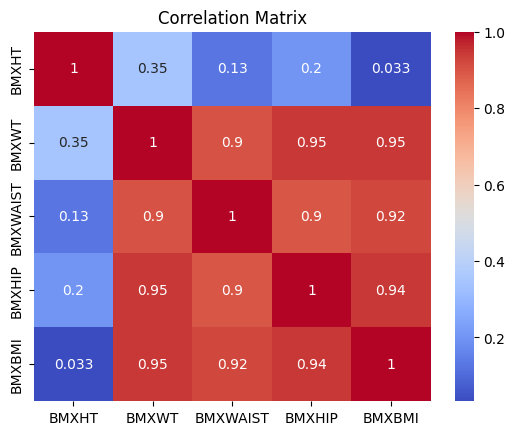

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [61]:
female["WHtR"] = female["BMXWAIST"] / female["BMXHT"]


In [62]:
female["WHR"] = female["BMXWAIST"] / female["BMXHIP"]


In [63]:
female[["BMXWAIST","BMXHT","BMXHIP","WHtR","WHR"]].head()


,BMXWAIST,BMXHT,BMXHIP,WHtR,WHR
0,117.9,160.2,126.1,0.735955,0.934972
1,103.1,152.7,125.5,0.675180,0.821514
2,92.0,161.2,106.2,0.570720,0.866290
3,90.5,157.4,101.0,0.574968,0.896040
4,73.2,154.6,92.5,0.473480,0.791351


In [64]:
male["WHtR"] = male["BMXWAIST"] / male["BMXHT"]


NameError: name 'male' is not defined

In [66]:
male = pd.read_csv(
    "nhanes_adult_male_bmx_2020.csv",
    sep=",",
    comment="#"
)


In [67]:
print(male.shape)
print(male.columns)


(4081, 7)
Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST'], dtype='str')


In [68]:
male["WHtR"] = male["BMXWAIST"] / male["BMXHT"]


In [69]:
male["WHR"] = male["BMXWAIST"] / male["BMXHIP"]


In [70]:
male[["BMXWAIST","BMXHT","BMXHIP","WHtR","WHR"]].head()


,BMXWAIST,BMXHT,BMXHIP,WHtR,WHR
0,120.4,182.3,108.2,0.660450,1.112754
1,86.8,184.2,94.5,0.471227,0.918519
2,109.6,185.3,107.8,0.591473,1.016698
3,108.3,167.8,106.4,0.645411,1.017857
4,107.0,181.6,120.2,0.589207,0.890183


In [71]:
female["Gender"] = "Female"
male["Gender"] = "Male"


In [72]:
combined = pd.concat([female, male])


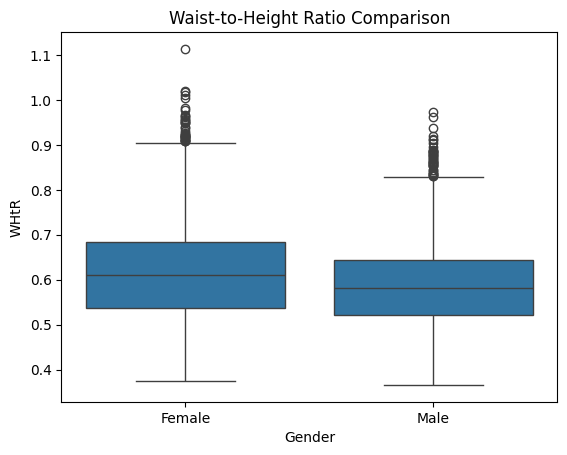

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Gender", y="WHtR", data=combined)
plt.title("Waist-to-Height Ratio Comparison")
plt.show()


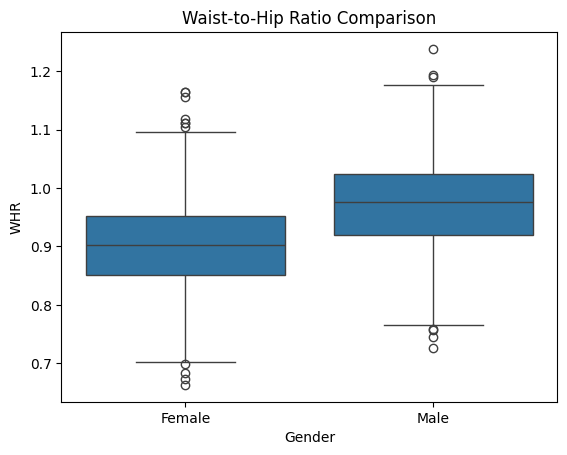

In [74]:
sns.boxplot(x="Gender", y="WHR", data=combined)
plt.title("Waist-to-Hip Ratio Comparison")
plt.show()


In [75]:
combined.groupby("Gender")[["WHtR","WHR"]].mean()


,WHtR,WHR
Gender,,
Female,0.615617,0.899979
Male,0.585983,0.970844


In [76]:
combined.groupby("Gender")[["WHtR","WHR"]].median()


,WHtR,WHR
Gender,,
Female,0.609741,0.902887
Male,0.581917,0.976720


In [77]:
combined.groupby("Gender")[["WHtR","WHR"]].std()


,WHtR,WHR
Gender,,
Female,0.108043,0.072258
Male,0.093693,0.077280


In [78]:
print(zfemale.columns)


Index(['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST',
       'BMXBMI'],
      dtype='str')


In [79]:
import numpy as np

# BMI values
bmi_values = zfemale["BMXBMI"].values

# Sort indices
sorted_index = np.argsort(bmi_values)

# Lowest 5
lowest_5 = sorted_index[:5]

# Highest 5
highest_5 = sorted_index[-5:]


In [80]:
selected_rows = np.concatenate([lowest_5, highest_5])

print(zfemale.iloc[selected_rows])


         BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
262  -2.079539 -1.222847 -1.547657 -1.168918 -2.194501 -2.040308 -1.941891   
3478 -1.879957 -0.189271 -1.718149  0.386333 -2.444072 -1.854699 -2.056836   
2126 -1.536491  1.807088  0.626117  0.572963 -2.265807 -1.675491 -1.706253   
2753 -1.842826 -0.260064 -0.226343  0.510753 -2.301460 -2.251517 -1.855682   
1209 -1.610754  0.886781 -0.098474  0.479648 -2.212328 -1.829098 -1.712001   
2268  4.246737  0.292121  1.862185 -0.982288  2.369083  4.103970  3.816866   
3022  4.455602  0.504499  1.691693 -1.137813  3.349541  3.982364  2.903051   
1472  4.348849  0.277962  2.842514  1.941585  4.365652  3.918361  3.753646   
1104  4.803709  0.886781  2.117923  1.817164  3.777377  4.020766  4.081240   
1096  4.362773 -0.033526 -0.055851 -0.173557  2.779093  4.315179  4.569757   

        BMXBMI  
262  -2.049997  
3478 -1.994644  
2126 -1.970650  
2753 -1.941546  
1209 -1.892971  
2268  4.395971  
3022  4.461483  
1472 